In [168]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn. metrics import classification_report, roc_auc_score, roc_curve
import pickle
import streamlit as st
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

In [169]:
# 1. Read data
data = pd.read_csv("spam.csv", encoding='latin-1')

In [170]:
# 2. Data pre-processing
source = data['v2']
target = data['v1']
# ham = 0, spam = 1
target = target.replace("ham", 0)
target = target.replace("spam", 1)

text_data = np.array(source)

count = CountVectorizer(max_features=6000)
count.fit(text_data)
bag_of_words = count.transform(text_data)

X = bag_of_words.toarray()

y = np.array(target)

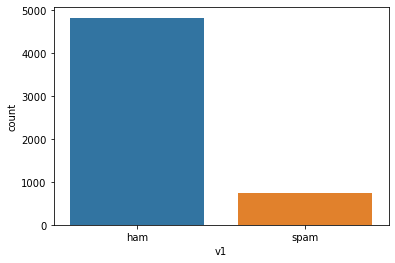

In [171]:
fig1 = sns.countplot(data=data[["v1"]], x="v1")
plt.show(fig1)

In [172]:
# Word Cloud Generation
df_spam  = data[data.v1 == 'spam'].copy()
df_ham = data[data.v1 == 'ham'].copy()
import wordcloud

def generate_wordcloud(data_frame, v1):
    text = ' '.join(data_frame['v2'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(v1, fontsize=20 )
    plt.show()

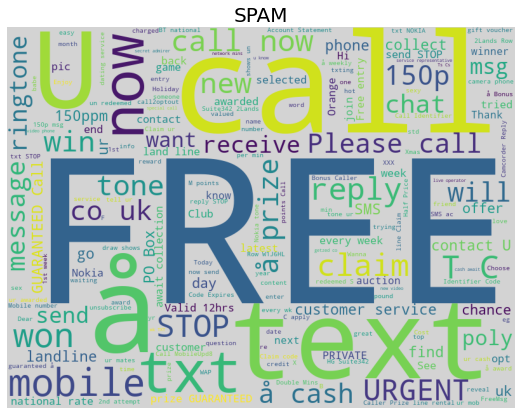

In [173]:
generate_wordcloud(df_spam, 'SPAM')

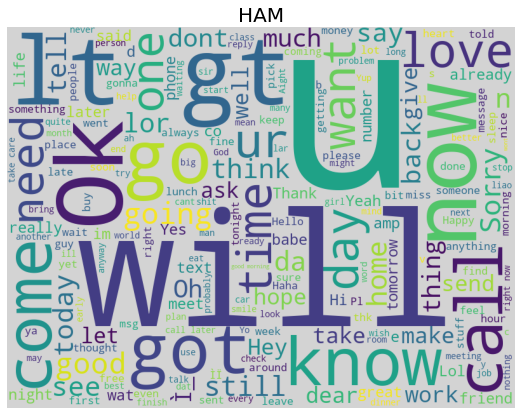

In [174]:
generate_wordcloud(df_ham, 'HAM')

In [175]:
# 3. Build ML model

In [176]:
# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0) 

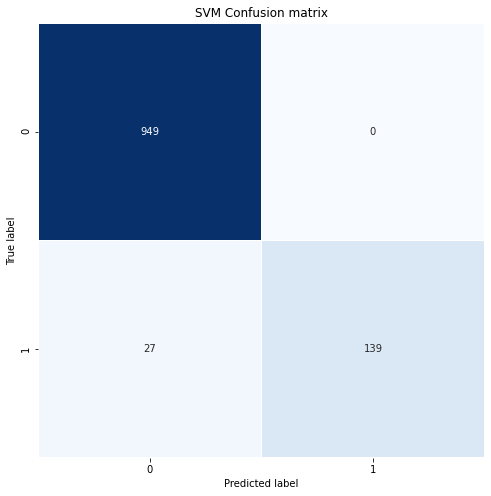

[[949   0]
 [ 27 139]]


In [177]:
#Support vector Machine
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
plt.figure(figsize=(8, 8))
# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
#Build Model
svm_model=SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
plot_confusion_matrix(y_test, svm_pred)
plt.title('SVM Confusion matrix')
plt.show()
svm_cm = confusion_matrix(y_test, svm_pred, labels=[0, 1])
print(svm_cm)

SVM Accuracy score:
Train Score: 0.9951
Train Score: 0.9758
Accuracy: 0.9758
 
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       949
           1       1.00      0.84      0.91       166

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.97      1115

SVM ROC Accuracy: 0.9187
 
SVM ROC Curve:


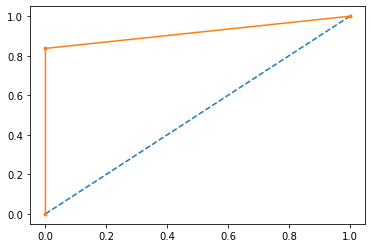

In [178]:
svm_score_train = svm_model.score(X_train,y_train)
svm_score_test = svm_model.score(X_test,y_test)
svm_acc = accuracy_score(y_test,svm_pred)

svm_cr = classification_report(y_test, svm_pred)

svm_roc = roc_auc_score(y_test, svm_pred)
print("SVM Accuracy score:")
print("Train Score:",round(svm_score_train,4))
print("Train Score:",round(svm_score_test,4))
print("Accuracy:",round(svm_acc,4))
print(" ")
print("SVM Classification Report:")
print(svm_cr)
print("SVM ROC Accuracy:",round(svm_roc,4))
print(" ")
print("SVM ROC Curve:")
from matplotlib import pyplot as plt
fpr, tpr, threholds = roc_curve(y_test, svm_pred)
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], linestyle="--")
ax.plot(fpr, tpr, marker=".")
plt.show(fig)

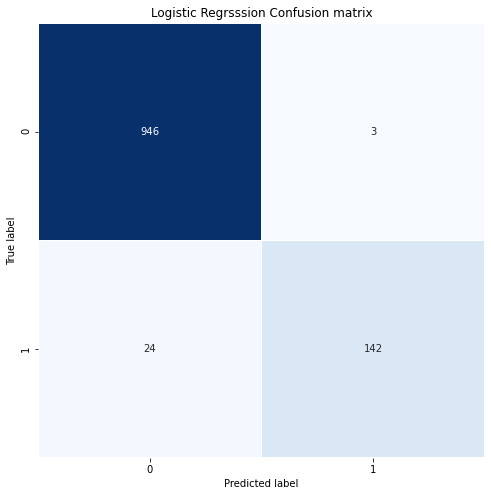

[[946   3]
 [ 24 142]]


In [179]:
#Logistic Regrsssion
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
plt.figure(figsize=(8, 8))
lg_model = LogisticRegression(solver='liblinear', penalty='l1')
lg_model.fit(X_train, y_train)
lg_pred = lg_model.predict(X_test)
plot_confusion_matrix(y_test, lg_pred)
plt.title('Logistic Regrsssion Confusion matrix')
plt.show()
lg_cm = confusion_matrix(y_test, lg_pred, labels=[0, 1])
print(lg_cm)


Logistic Regrsssion Accuracy score:
Train Score: 0.9915
Train Score: 0.9758
Accuracy: 0.9758
 
Logistic Regrsssion Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       949
           1       0.98      0.86      0.91       166

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Logistic Regrsssion ROC Accuracy: 0.9867
 
Logistic Regrsssion ROC Curve:


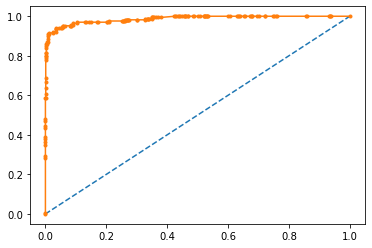

In [181]:
#4.Logistic Regrsssion Evaluate model
lg_score_train = lg_model.score(X_train,y_train)
lg_score_test = lg_model.score(X_test,y_test)
lg_acc = accuracy_score(y_test,lg_pred)

lg_cr = classification_report(y_test, lg_pred)

lg_prob = lg_model.predict_proba(X_test)
lg_roc = roc_auc_score(y_test, lg_prob[:, 1])
print("Logistic Regrsssion Accuracy score:")
print("Train Score:",round(lg_score_train,4))
print("Train Score:",round(lg_score_test,4))
print("Accuracy:",round(lg_acc,4))
print(" ")
print("Logistic Regrsssion Classification Report:")
print(lr_cr)
print("Logistic Regrsssion ROC Accuracy:",round(lg_roc,4))
print(" ")
print("Logistic Regrsssion ROC Curve:")
from matplotlib import pyplot as plt
fpr, tpr, threholds = roc_curve(y_test, lg_prob[:, 1])
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], linestyle="--")
ax.plot(fpr, tpr, marker=".")
plt.show(fig)

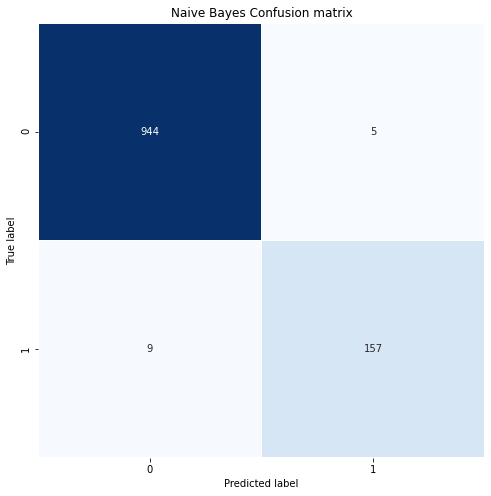

[[944   5]
 [  9 157]]


In [182]:
# Naive Bayes model
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
plt.figure(figsize=(8, 8))
clf = MultinomialNB()
nb_model = clf.fit(X_train, y_train)
nb_pred = clf.predict(X_test)
plot_confusion_matrix(y_test, nb_pred)
plt.title('Naive Bayes Confusion matrix')
plt.show()
nb_cm = confusion_matrix(y_test, nb_pred, labels=[0, 1])
print(nb_cm)


Naive Bayes Accuracy score:
Train Score: 0.9926
Train Score: 0.9874
Accuracy: 0.9874
 
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       949
           1       0.97      0.95      0.96       166

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115

Naive Bayes ROC Accuracy: 0.9867
 
Naive Bayes ROC Curve:


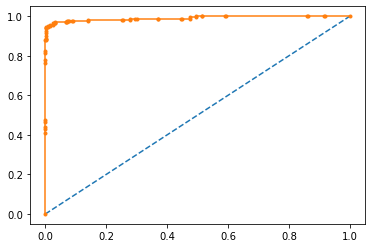

In [183]:
#4.Naive Bayes Evaluate model
nb_score_train = nb_model.score(X_train,y_train)
nb_score_test = nb_model.score(X_test,y_test)
nb_acc = accuracy_score(y_test,nb_pred)

nb_cr = classification_report(y_test, nb_pred)

nb_prob = nb_model.predict_proba(X_test)
nb_roc = roc_auc_score(y_test, lg_prob[:, 1])
print("Naive Bayes Accuracy score:")
print("Train Score:",round(nb_score_train,4))
print("Train Score:",round(nb_score_test,4))
print("Accuracy:",round(nb_acc,4))
print(" ")
print("Naive Bayes Classification Report:")
print(nb_cr)
print("Naive Bayes ROC Accuracy:",round(nb_roc,4))
print(" ")
print("Naive Bayes ROC Curve:")
from matplotlib import pyplot as plt
fpr, tpr, threholds = roc_curve(y_test, nb_prob[:, 1])
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], linestyle="--")
ax.plot(fpr, tpr, marker=".")
plt.show(fig)

In [184]:
#Deep Learning Model

In [185]:
# Importing libraries for model building and predictions

# for model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import EarlyStopping

# for text preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# split data into train and test set
from sklearn.model_selection import train_test_split

In [186]:
data['v1'] = data['v1'].map( 
    {'spam': 1, 'ham': 0} )

In [187]:
# Splitting dataset for training and test

X = data['v2'].values
y = data['v1'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [188]:
# prepare tokenizer

token = Tokenizer()
token.fit_on_texts(X_train)

In [189]:
encoded_train = token.texts_to_sequences(X_train)
encoded_test = token.texts_to_sequences(X_test)
print(encoded_train[0:2])

[[38, 30, 8, 5, 273, 1989, 81, 116, 26, 11, 1656, 322, 10, 53, 18, 299, 30, 349, 1990], [799, 15, 2555, 1442, 1127, 192, 2556, 171, 12, 98, 1991, 44, 195, 1657, 2557, 1992, 2558, 21, 9, 4, 203, 1025, 225]]


In [190]:
# pad documents to a max length of 8words
max_length = 8

padded_train = pad_sequences(encoded_train, maxlen = max_length, padding = 'post')
padded_test = pad_sequences(encoded_test, maxlen = max_length, padding = 'post')

print(padded_train)

[[ 322   10   53 ...   30  349 1990]
 [1992 2558   21 ...  203 1025  225]
 [  83 1443    4 ...    2 3794 3795]
 ...
 [1477   30 2063 ...  239   30 2064]
 [ 763 1679 1161 ...    0    0    0]
 [   8  155   20 ...    8  290  175]]


In [191]:
vocab_size = len(token.word_index) + 1
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 24, input_length = max_length))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
# summarize the model
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 8, 24)             190920    
                                                                 
 flatten_3 (Flatten)         (None, 192)               0         
                                                                 
 dense_12 (Dense)            (None, 500)               96500     
                                                                 
 dense_13 (Dense)            (None, 200)               100200    
                                                                 
 dropout_3 (Dropout)         (None, 200)               0         
                                                                 
 dense_14 (Dense)            (None, 100)               20100     
                                                                 
 dense_15 (Dense)            (None, 1)                

In [192]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10)
# fit the model
model.fit(x = padded_train,
          y = y_train,
          epochs = 10,
          validation_data = (padded_test, y_test),
          verbose=1,
          callbacks=[early_stop])

Epoch 1/10
140/140 [==============================] - 1s 5ms/step - loss: 0.2046 - accuracy: 0.9221 - val_loss: 0.0818 - val_accuracy: 0.9821
Epoch 2/10
140/140 [==============================] - 1s 4ms/step - loss: 0.0488 - accuracy: 0.9832 - val_loss: 0.0729 - val_accuracy: 0.9848
Epoch 3/10
140/140 [==============================] - 1s 4ms/step - loss: 0.0125 - accuracy: 0.9957 - val_loss: 0.1125 - val_accuracy: 0.9865
Epoch 4/10
140/140 [==============================] - 1s 4ms/step - loss: 0.0019 - accuracy: 0.9998 - val_loss: 0.1722 - val_accuracy: 0.9830
Epoch 5/10
140/140 [==============================] - 1s 4ms/step - loss: 2.3284e-06 - accuracy: 1.0000 - val_loss: 0.2521 - val_accuracy: 0.9812
Epoch 6/10
140/140 [==============================] - 1s 4ms/step - loss: 3.6611e-08 - accuracy: 1.0000 - val_loss: 0.2913 - val_accuracy: 0.9821
Epoch 7/10
140/140 [==============================] - 1s 4ms/step - loss: 5.0657e-08 - accuracy: 1.0000 - val_loss: 0.2876 - val_accuracy: 0

In [193]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def c_report(y_true, y_pred):
   print("Classification Report")
   print(classification_report(y_true, y_pred))
   acc_sc = accuracy_score(y_true, y_pred)
   print("Accuracy : "+ str(acc_sc))
   return acc_sc

def plot_confusion_matrix(y_true, y_pred):
   mtx = confusion_matrix(y_true, y_pred)
   sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5, 
               cmap="Blues", cbar=False)
   plt.ylabel('True label')
   plt.xlabel('Predicted label')

In [194]:
preds = (model.predict(padded_test) > 0.5).astype("int32")

35/35 [==============================] - 0s 2ms/step


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.96      0.90      0.93       150

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Accuracy : 0.9820627802690582
ANN Accuracy score:
Accuracy: 0.9821
 
ANN ROC Accuracy: 0.9474
 
ANN ROC Curve:


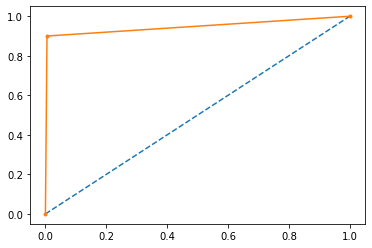

In [195]:
c_report(y_test, preds)
#ann_score_train = model.evaluate(X_train,y_train)
#ann_score_test = model.evaluate(X_test,y_test)
ann_acc = accuracy_score(y_test,preds)
ann_roc = roc_auc_score(y_test, preds)
print("ANN Accuracy score:")
#print("Train Score:",round(ann_score_train,4))
#print("Test Score:",round(ann_score_test,4))
print("Accuracy:",round(ann_acc,4))
print(" ")
print("ANN ROC Accuracy:",round(ann_roc,4))
print(" ")
print("ANN ROC Curve:")
from matplotlib import pyplot as plt
fpr, tpr, threholds = roc_curve(y_test, preds)
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], linestyle="--")
ax.plot(fpr, tpr, marker=".")
plt.show(fig)

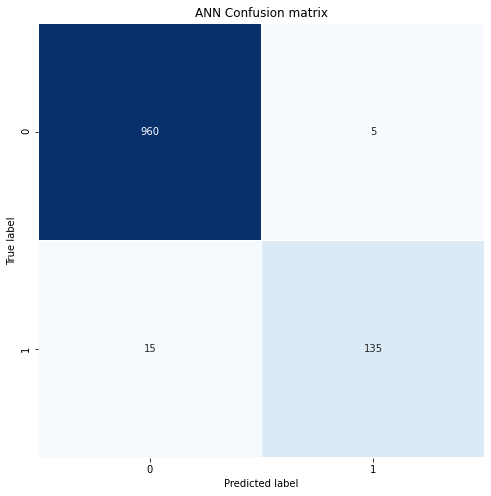

[[960   5]
 [ 15 135]]


In [196]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8, 8))
plot_confusion_matrix(y_test, preds)
plt.title('ANN Confusion matrix')
plt.show()
ann_cm = confusion_matrix(y_test, preds, labels=[0, 1])
print(ann_cm)

In [197]:
model.save("spam_model")

INFO:tensorflow:Assets written to: spam_model\assets


2023-01-17 12:19:00.336 Assets written to: spam_model\assets


In [198]:
import pickle

with open('spam_model/tokenizer.pkl', 'wb') as output:
   pickle.dump(token, output, pickle.HIGHEST_PROTOCOL)

In [199]:
import tensorflow as tf

s_model = tf.keras.models.load_model("spam_model")
with open('spam_model/tokenizer.pkl', 'rb') as input:
    tokenizer = pickle.load(input)

In [200]:
sms = ["Hi, I'll be late, lets check this tomorrow "]
sms_proc = token.texts_to_sequences(sms)
sms_proc = pad_sequences(sms_proc, maxlen=max_length, padding='post')
pred = (model.predict(sms_proc) > 0.5).astype("int32").item()
print(pred)

1/1 [==============================] - 0s 5ms/step
0


In [201]:
sms = ["Free entry in 2 a wkly comp to win FA Cup fina..."]
sms_proc = token.texts_to_sequences(sms)
sms_proc = pad_sequences(sms_proc, maxlen=max_length, padding='post')
pred = (model.predict(sms_proc) > 0.5).astype("int32").item()
print(pred)

1/1 [==============================] - 0s 26ms/step
1
